자세한 내용은 [출처](https://elitedatascience.com/python-seaborn-tutorial)를 확인해주세요.

# Seaborn 소개

`Seaborn`은 강력하지만 다루기 힘든 시각화 라이브러리인 `Matplotlib`에 좀 더 나은 환경을 제공하기 위해 만들어졌습니다. [공식 웹페이지](https://seaborn.pydata.org/)는 다음과 같이 `Seaborn`을 소개하고 있습니다. 

> Matplotlib이 쉬운 일을 쉽게, 어려운 일은 가능하게 만들때, Seaborn은 어려운 일도 쉽게 만드려고 합니다. 

Seaborn은 아래와 같은 기능을 제공합니다.

- 기본 테마가 아름답습니다.
- 색상 표를 사용자가 정의할 수 있습니다.
- 매력적인 통계 도표 만들기.
- 쉽고 유연하게 결과물을 출력합니다.

강조하고 싶은 점은 Seaborn이 탐색적 분석을 위한 최선의 도구라는 것입니다. Seaborn을 사용한다면 원본 데이터를 빠르고 효율적으로 파악할 수있습니다.

다만 Seaborn은 Matplotlib의 대체품이 아닌 보완품입니다. Matplotlib 위에서 작동하기 때문에 Matplotlib를 다루는 방법도 알고 있어야 합니다.

## 시작하기 앞서

필요한 라이브러리를 불러옵니다.

In [1]:
# importing libraries and dataset
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

# 포켓몬스터 데이터

포켓몬스터 게임에서 수집한 데이터인 [Pokemon.csv](https://github.com/veekun/pokedex/blob/master/pokedex/data/csv/pokemon.csv)파일을 사용하겠습니다.

먼저 `read_csv`기능을 사용해 CSV형식으로 저장된 데이터를 불러옵니다. 

In [2]:
# Read dataset
df = pd.read_csv("G:/Pokemon.csv", index_col=0)
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


## 선형 회귀 시각화

공격력과 방어력간에 선형의 관계가 있는지 시각화를 통해 살펴봅니다.

(0, 220.91225584629962)

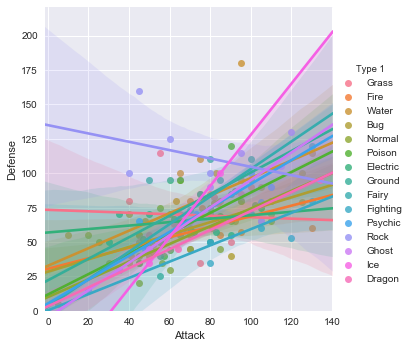

In [7]:
sns.lmplot(x="Attack", y="Defense", data=df, hue="Type 1")
plt.ylim(0, None)

다수의 포켓몬들의 공격력과 방어력은 명백한 선형의 관계가 있는것을 볼 수 있습니다. 유령형 포켓몬들은 공격력이 늘면 오히려 방어력이 줄어드는 경향이 있네요.

## 상자 그림 그리기

모든 포켓몬의 스텟(공격력, 방어력, 체력 등등)의 상자그림을 그려보겠습니다.

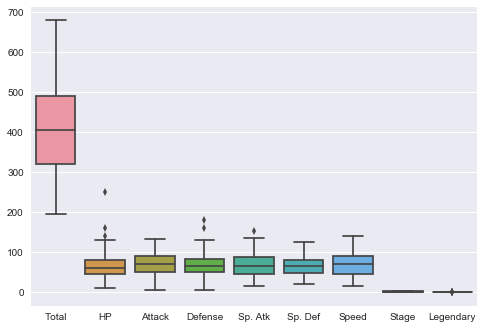

In [8]:
sns.boxplot(data=df)

필요없는 값들을 빼고 다시 그려보겠습니다. 

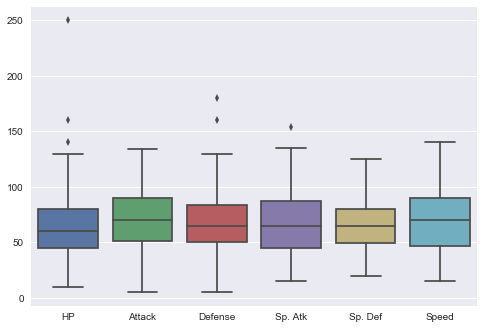

In [9]:
stats_df = df.drop(["Total", "Stage", "Legendary"], axis=1)
sns.boxplot(data=stats_df)

모든 값들이 비슷비슷하네요. 다만 체력(hp)의 경우는 아주높은 값의 특이값(outlier)가 존재 합니다.

## 바이올린 도표 그리기
공격력을 각각의 포켓몬 유형에 따라서 바이올린 도표를 그려봅니다. 기본적으로 상자그림과 동일한 유형입니다.

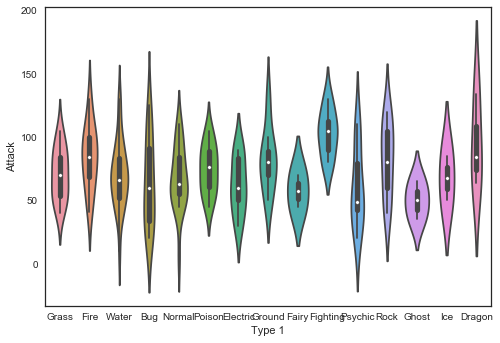

In [11]:
sns.set_style("white")
sns.violinplot(x="Type 1", y="Attack", data=df)

격투(fighting)타입의 포켓몬들이 공격력이 높은것을 확인 할 수 있습니다.

각각의 유형들을 원하는 색상으로 지정해줄수도 있습니다. 아래와 같이 색상표를 정의합니다.

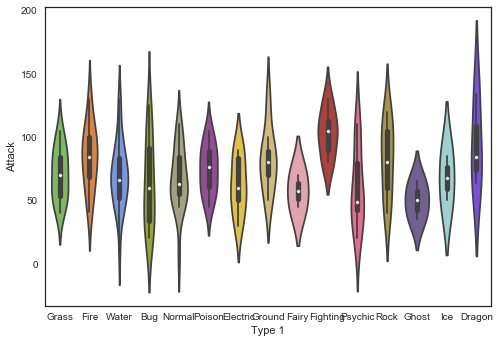

In [13]:
pkmn_type_colors = [
    "#78C850",  # Grass
    "#F08030",  # Fire
    "#6890F0",  # Water
    "#A8B820",  # Bug
    "#A8A878",  # Normal
    "#A040A0",  # Poison
    "#F8D030",  # Electric
    "#E0C068",  # Ground
    "#EE99AC",  # Fairy
    "#C03028",  # Fighting
    "#F85888",  # Psychic
    "#B8A038",  # Rock
    "#705898",  # Ghost
    "#98D8D8",  # Ice
    "#7038F8",  # Dragon
]
sns.violinplot(x="Type 1", y="Attack", data=df, palette=pkmn_type_colors)

## 산포도(Scatter plot)
산포도로 표현할 수 도 있습니다.

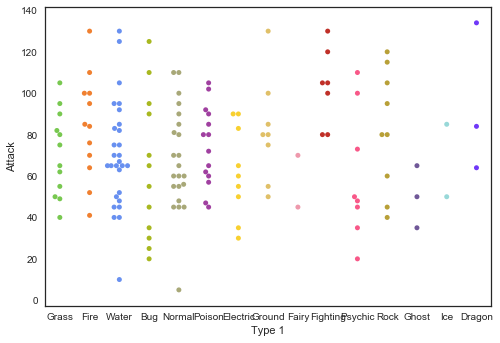

In [14]:
# Swarm plot with Pokemon color palette
sns.swarmplot(x="Type 1", y="Attack", data=df, palette=pkmn_type_colors)

## 산포도와 바이올린 도표 겹치기
각각의 도표를 겹쳐서 더많은 정보를 표현 할 수도 있습니다.

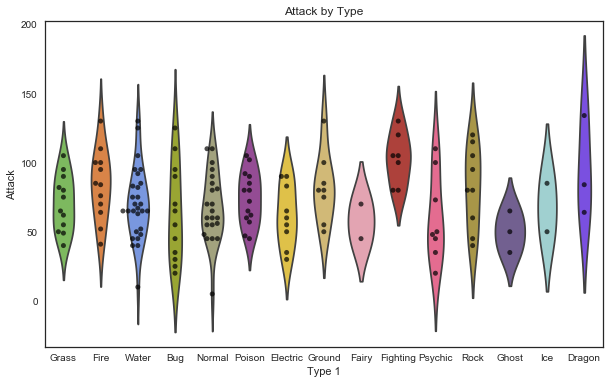

In [15]:
plt.figure(figsize=(10, 6))

# Create plot
sns.violinplot(
    x="Type 1",
    y="Attack",
    data=df,
    inner=None,  # Remove the bars inside the violins
    palette=pkmn_type_colors,
)

sns.swarmplot(
    x="Type 1", y="Attack", data=df, color="k", alpha=0.7  # Make points black
)  # and slightly transparent

# Set title with matplotlib
plt.title("Attack by Type")

# 함께 모아서

각각의 특성에 대한 그림을 반복해서 그릴수도 있습니다. 하지만 하나의 그림에 정보를 표현하려면 어떻게 해야 할까요? 이런 상황에서 우리는 `Pandas`의 `melt()`기능을 사용합니다. 

아래의 예를 확인하세요.

In [16]:
# Melt DataFrame
melted_df = pd.melt(stats_df, 
                    id_vars=["Name", "Type 1", "Type 2"], # Variables to keep
                    var_name="Stat") # Name of melted variable
#melted_df.head()
print stats_df.shape
print melted_df.shape

(151, 9)
(906, 5)


## 산포도 그리기
복잡한 정보를 표현할때는 아래와 같은 산포도가 좋습니다.

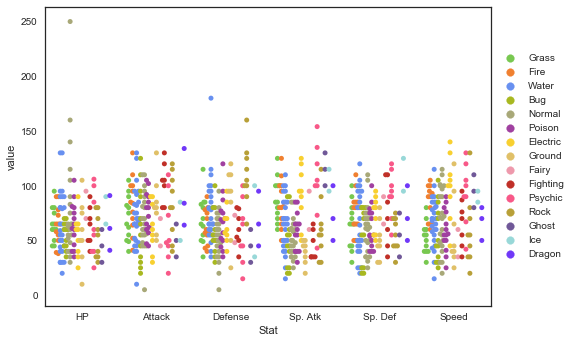

In [22]:
sns.swarmplot(
    x="Stat",
    y="value",
    data=melted_df,
    hue="Type 1",
    split=True,  # 2. Separate points by hue
    palette=pkmn_type_colors,
)  # 3. Use Pokemon palette

# put a legend to the right of the current axis
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

## 히트맵 그리기
각각의 스텟들 사이에 상관관계가 있는지 히트맵을 그려서 확인해보겠습니다.

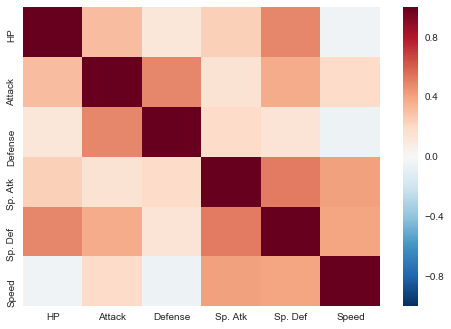

In [23]:
corr = stats_df.corr()

# Heatmap
sns.heatmap(corr)

## 히스토그램 그리기

공격력에 대한 히스토그램을 그려봅니다.

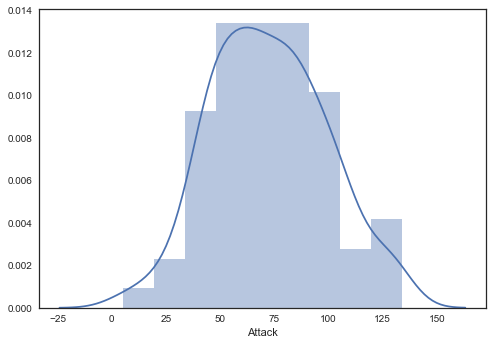

In [24]:
# Distribution Plot (a.k.a. Histogram)
sns.distplot(df.Attack)

# 카운트 플롯(Count Plot)
각각의 값들의 갯수를 표현하는 도표입니다.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

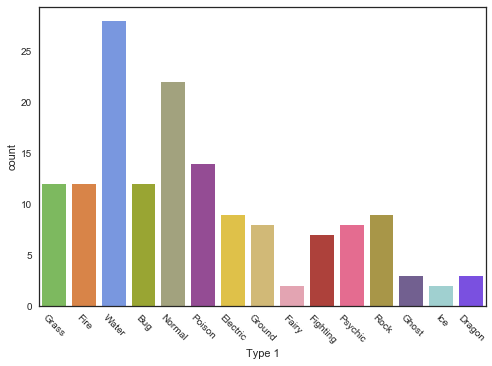

In [25]:
sns.countplot(x="Type 1", data=df, palette=pkmn_type_colors)

# Rotate x-labels
plt.xticks(rotation=-45)

# 요인 플롯(Factor Plot)

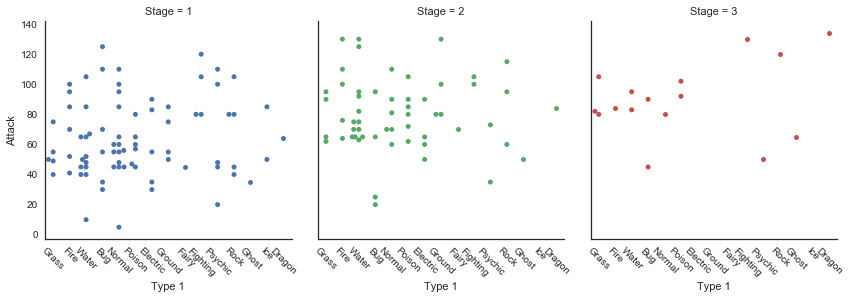

In [26]:
g = sns.factorplot(
    x="Type 1",
    y="Attack",
    data=df,
    hue="Stage",  # Color by stage
    col="Stage",  # Separate by stage
    kind="swarm",
)  # Swarmplot

# Rotate x-axis labels
g.set_xticklabels(rotation=-45)

# Doesn't work because only rotates last plot
# plt.xticks(rotation=-45)

# 밀도 플롯(Density Plot)
공격력와 방어력을 축으로 각각의 포켓몬들의 밀도를 표현합니다.

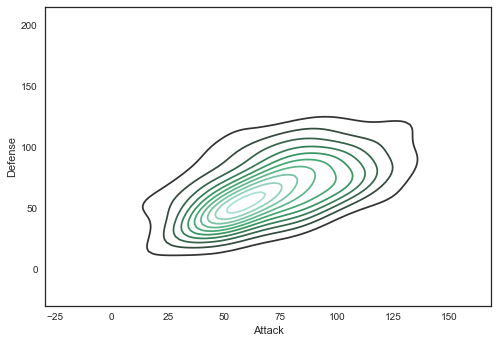

In [27]:
sns.kdeplot(df.Attack, df.Defense)

# 분포도(Joint Distribution Plot)
공격력과 방어력을 축으로 각각의 분포를 하나의 그림에서 확인하는 방법입니다.

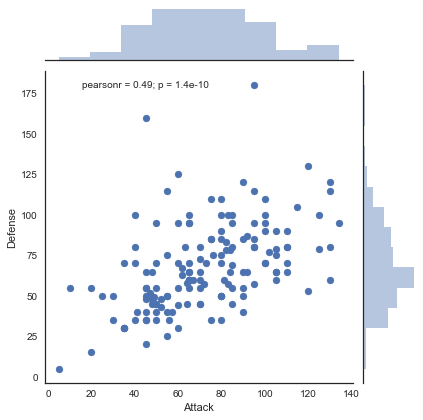

In [28]:
sns.jointplot(x="Attack", y="Defense", data=df)

# 마치며,

Seaborn은 Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트등의 기능을 추가해 좀 더 멋있게 시각화를 해주는 도구 입니다. 더 멋있는 도표는 [예제 갤러리](https://seaborn.pydata.org/examples/index.html)에서 확인하세요.